In [ ]:
#### import numpy as np
import pandas as pd
from zipfile import ZipFile
import sys
from io import BytesIO
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sys.path.append('../classes')
from bicycles import Bicycles
%matplotlib inline

In [172]:
dataset = Bicycles()

In [173]:
dataset.state

'empty'

In [174]:
dataset.read()

In [175]:
dataset.download()

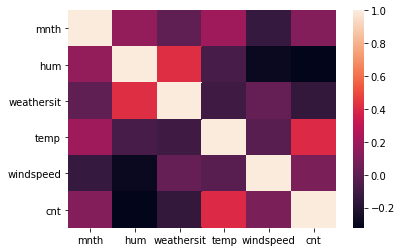

In [17]:
dataset.correlation_matrix()

#### Interpretation
As we can see in the correlation matrix, most features only show weak correlations. <br/>
Only the pair of season and month stands out with a coefficient of correlation of around 0.8. <br/>
However, this does not give us any addiational insight since it's clear that certain months belong to a certain season.

A more interesting feature combination to look into in more detail might be the count of bike rentals and the temperature, <br/>
that seem to be moderately correlated with a coeffiecient of correlation of about 0.5. <br/>
We can only determine weak correlations between the count of bike rentals and the features month, humidity, season and windspeed.

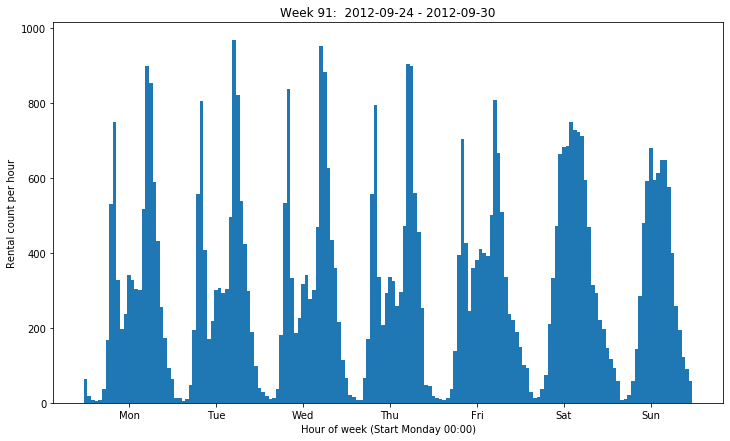

In [18]:
dataset.plot_week(91)

#### Interpretation
From the chart above, we can deduce that during the weekdays the rental count per hour is higher than the count during the weekends. <br/> However, the volume of bike rentals is much higher on Fridays and Saturdays and surprisingly, Sunday is the day with the lowest number of bike rentals. <br/> <br/>
Also, there are two spikes for each day during the weekdays from which we can infer that rental patterns vary across different hours of the day. This is not true for Saturday and Sunday. <br/> With the plot_method we can now look at different months to get a feeling of whether this patterns holds across time. <br/>

In [19]:
dataset.data.head(2)

instant      dteday  season  yr  mnth hr holiday weekday  \
timestamp                                                                       
2011-01-01 00:00:00        1  2011-01-01  Spring   0     1  0       0       6   
2011-01-01 01:00:00        2  2011-01-01  Spring   0     1  1       0       6   

                    workingday  weathersit  ...   atemp   hum  windspeed  \
timestamp                                   ...                            
2011-01-01 00:00:00          0           1  ...  0.2879  0.81        0.0   
2011-01-01 01:00:00          0           1  ...  0.2727  0.80        0.0   

                     casual  registered  cnt           timestamp calendarweek  \
timestamp                                                                       
2011-01-01 00:00:00       3          13   16 2011-01-01 00:00:00           52   
2011-01-01 01:00:00       8          32   40 2011-01-01 01:00:00           52   

                     mnth_categorical  \
timestamp                               
2011-01-01 00:00:00           January   
2011-01-01 01:00:00           January   

                                                weathersit_categorical  
timestamp                                                               
2011-01-01 00:00:00   Clear + Few clouds + Partly cloudy + Partly c...  
2011-01-01 01:00:00   Clear + Few clouds + Partly cloudy + Partly c...  

[2 rows x 21 columns]

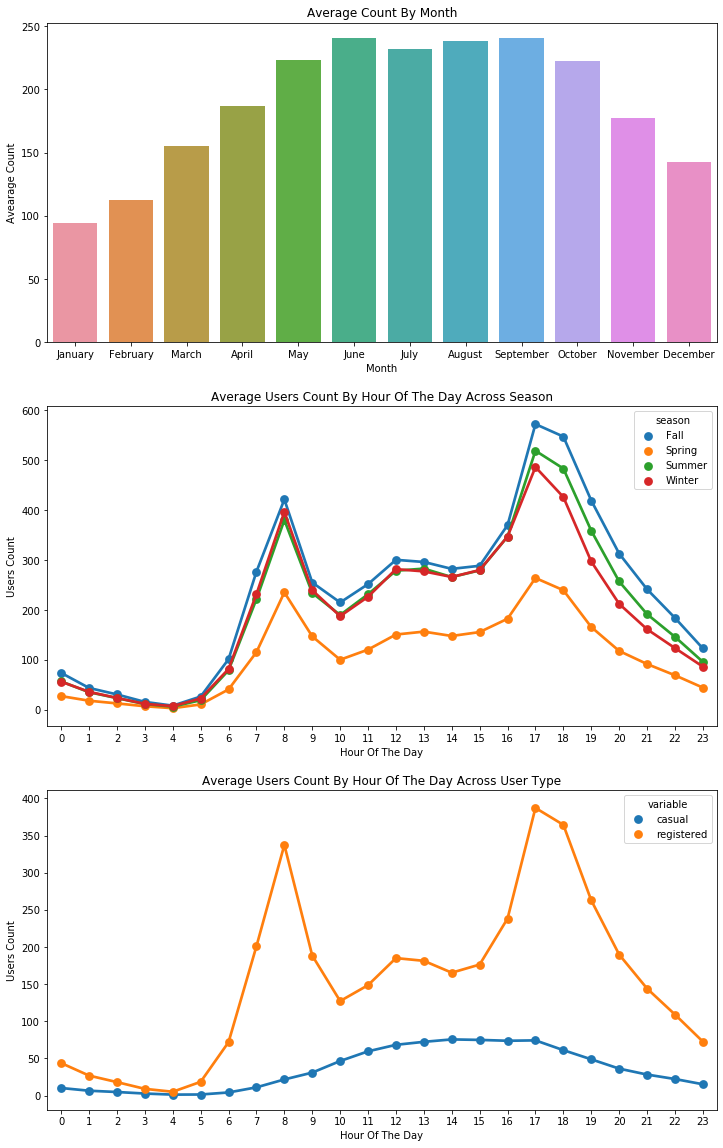

In [20]:
dataset.visualizing_average_count()

#### Interpretation
It is quiet obvious that people tend to rent bike during summer season since it is really conducive to ride bike at that season. Therefore June, July and August has got relatively higher demand for bicycle. <br/>

On weekdays more people tend to rent bicycle around 7AM-8AM and 5PM-6PM. As we mentioned earlier this can be attributed to regular school and office commuters. <br/>

The peak user count around 7AM-8AM and 5PM-6PM is purely contributed by registered user. <br/>


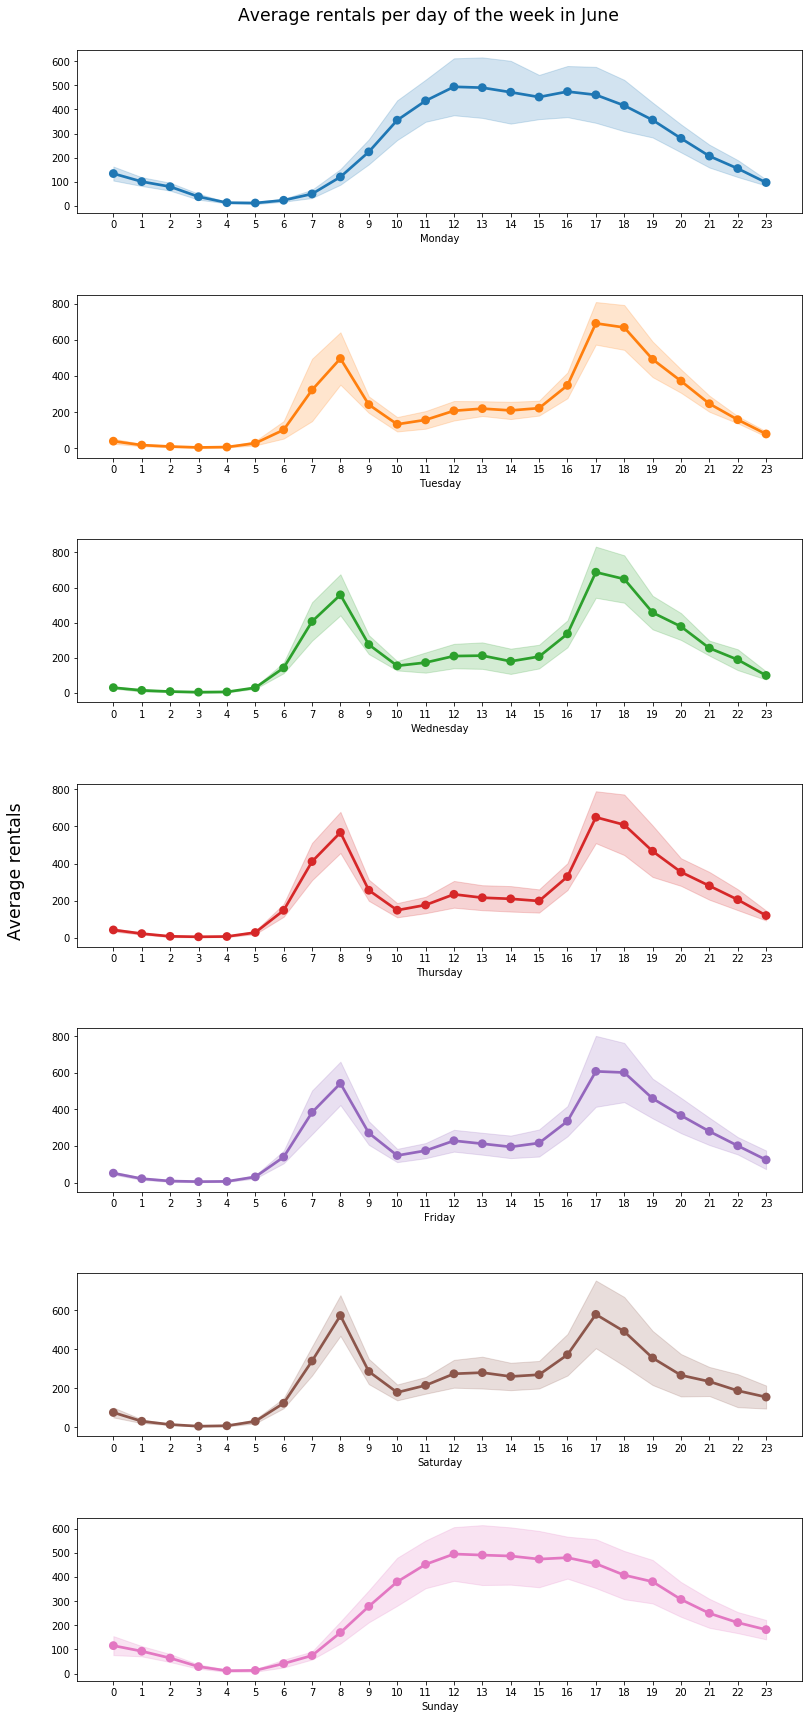

In [176]:
dataset.forecast('June')

#### Interpretation

After having analyzed the seasonal characteristics of bike rentals, above we deeply examine the month of June. June is the month in which bicyles are rented the most, followed by September which is though in the fall season.

However, they share similar trendings: Monday and Sunday are the most 'active' days, especially in the hours after lunch ranging from 12 (the highest) to 17/18 PM when it starts decreasing again.
From the shaded area we can also see these are the periods with greater variations, especially in these two days. All other days share almost the same pattern with each other, with Saturday the busiest by not much.

Further analyses for other months confirm the similar trends thoughout the week, with lower values of course.
